## Exercise 2

Consider the subset of the Quantum Physics Dataset provided by Cornell University. The goal is to learn a classification rule that differentiates between two types of particles generated in high energy collider experiments.

Load the data as follows:

```python
X = np.genfromtxt('X.dat')  # Features
y = np.genfromtxt('y.dat')  # Labels (+1, -1)
```

Classify the data by solving the following minimization problem

$$
\min_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{N} \sum_i J_i(\mathbf{w}),
$$

where

$$
J_i(\mathbf{w}) = L(\mathbf{w}^T \mathbf{x}_i, y_i),
$$

with 

$$
L(s, y) = \log(1 + \exp(-sy)).
$$

1. Implement the Stochastic Gradient Descent algorithm (SGD) (batch size = 1) with constant learning rate equal to 0.5. Perform 5000 iterations and initialize the weight vector to zero.

2. Repeat the minimization using the SGD with the following update for the learning rate

$
\eta_k = \frac{\eta_0}{1 + \frac{k}{100}},
$

where $k$ is the iteration number and $\eta_0 = 0.05$

Comment the results.


In [7]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [5]:
X = np.genfromtxt('X.dat')  # Features
y = np.genfromtxt('y.dat')  # Labels (+1, -1)

In [6]:
X.shape, y.shape

((10000, 46), (10000,))

In [9]:
# defining the function f(x)

def loss_fn(w, x, y):
    return jnp.mean(jnp.log(1 + jnp.exp(-y * jnp.dot(x, w))))

loss_jit = jax.jit(loss_fn) #ottimizza l'esecuzione della funzione
grad_fn = jax.grad(loss_fn, argnums=2) #calcola il gradiente della funzione rispetto ai pesi
grad_fn = jax.jit(grad_fn) #ottimizza l'esecuzione della funzione gradiente

1. Implement the Stochastic Gradient Descent algorithm (SGD) (batch size = 1) with constant learning rate equal to 0.5. Perform 5000 iterations and initialize the weight vector to zero.


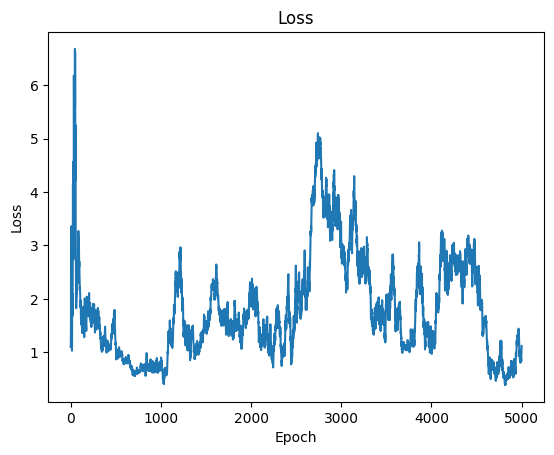

In [21]:
# implement the SGD algorithm, with constant learning rate
batch_size = 1
learning_rate = 0.5
n_epochs = 5000

convergence_history = []

w = jnp.array([0.0 for i in range(X.shape[1])])

for i in range(n_epochs):
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]

    grad = grad_fn(X_batch, y_batch, w)
    w = w - learning_rate * grad
    convergence_history.append(loss_jit(X, y, w))

plt.figure()
plt.plot(convergence_history)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

2. Repeat the minimization using the SGD with the following update for the learning rate

$
\eta_k = \frac{\eta_0}{1 + \frac{k}{100}},
$

where $k$ is the iteration number and $\eta_0 = 0.05$

Comment the results.

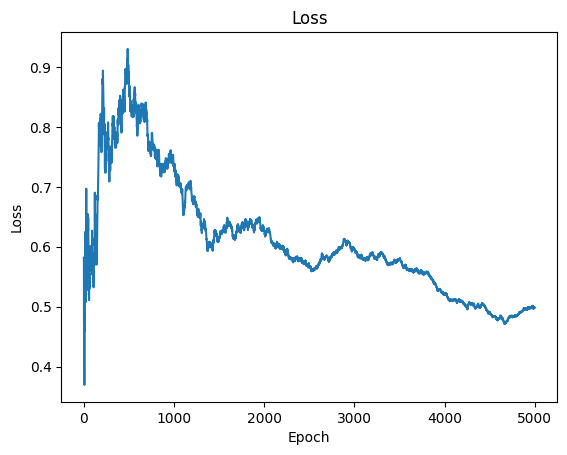

In [17]:
# implement the SGD algorithm, with constant learning rate
batch_size = 1
n_epochs = 5000
eta = 0.5

learning_rate = lambda k: eta / (1 + k/100)

convergence_history = []

w = jnp.array([0.0 for i in range(X.shape[1])])

for i in range(n_epochs):
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]

    grad = grad_fn(X_batch, y_batch, w)
    w = w - learning_rate(i) * grad
    convergence_history.append(loss_jit(X, y, w))

plt.figure()
plt.plot(convergence_history)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Il primo grafico con un learning rate costante mostra un andamento della loss molto irregolare con oscillazioni evidenti e ripetute: la perdita oscilla notevolmente suggerendo che l'algoritmo non converge in modo stabile verso un minimo. 
Questo comportamento è tipico quando il learning rate è costante e molto alto: il modello può saltare avanti e indietro attorno al minimo senza mai stabilizzarsi.
Inoltre il fatto che batch_size sia 1 significa che ogni aggiornamento è molto influenzato dai singoli campioni, che possono variare notevolmente

Il secondo grafico con learning rate variabile aiuta a ridurre la dimensione degli aggiornamenti verso la fine dell'addestramento, permettendo al modello di stabilizzarsi vicino al minimo.
L'algoritmo parte con aggiornamenti relativamente grandi e poi riduce la velocità di aggiornamento, riducendo così le oscillazioni e migliorando la stabilità